# Basic Workflow of Machine Learning

In [1]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
import tensorflow.keras.datasets as datasets
import numpy as np
import matplotlib.pyplot as pl

In [3]:
# Load MNIST dataset
data = tf.keras.datasets.mnist.load_data(path='/data/shared/datasets/mnist.npz')
train_data, test_data = data
x_train, y_train = train_data
x_test, y_test = test_data

In [6]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [7]:
x_train = x_train / 255
x_test = x_test / 255

Text(0.5, 0, 'digit = 6')

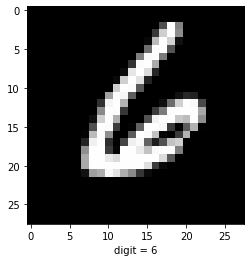

In [13]:
i = 901
pl.imshow(x_train[i], cmap='gray')
pl.xlabel('digit = %d' % y_train[i])

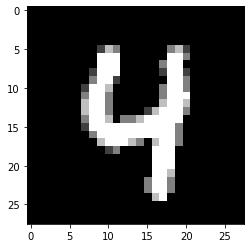

In [17]:
#
# Numpy tricks to picking a specific digit
#
mask_4 = y_train == 4

pl.imshow(x_train[mask_4][20], cmap='gray')

In [30]:
model = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28*28,), name='reshape'),
    layers.Dense(10, name='dense'),
    layers.Activation('softmax', name='softmax'),
], name='my_model')

In [31]:
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
softmax (Activation)         (None, 10)                0         
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer=optimizers.Adam(0.1), loss=losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [33]:
log = model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 2s 1ms/step - loss: 1.6708 - acc: 0.8322
Epoch 2/3
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8950 - acc: 0.8783
Epoch 3/3
1875/1875 [==============================] - 2s 1ms/step - loss: 1.8897 - acc: 0.8857


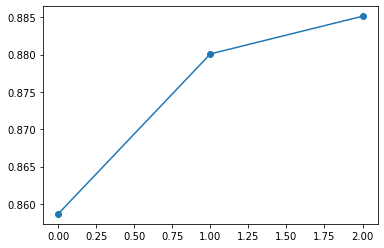

In [37]:
pl.plot(log.history['acc'], '-o');

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 708us/step - loss: 2.0403 - acc: 0.8882


[2.040296792984009, 0.8881999850273132]

# Bigger Model

In [54]:
model2 = models.Sequential([
    layers.Input(shape=(28, 28)),
    layers.Reshape((28*28,), name='reshape2'),
    layers.Dense(100, activation='relu', name='dense2_1'),
    layers.Dense(10, name='dense2_out'),
    layers.Activation('softmax', name='softmax_2'),
], name='my_model2')

In [55]:
model2.summary()

Model: "my_model2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape2 (Reshape)           (None, 784)               0         
_________________________________________________________________
dense2_1 (Dense)             (None, 100)               78500     
_________________________________________________________________
dense2_out (Dense)           (None, 10)                1010      
_________________________________________________________________
softmax_2 (Activation)       (None, 10)                0         
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [58]:
model2.compile(optimizer=optimizers.Adam(1e-3), loss=losses.SparseCategoricalCrossentropy(), metrics=['acc'])

In [59]:
model2.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3655 - acc: 0.9004
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1301 - acc: 0.9619
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0902 - acc: 0.9735
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0687 - acc: 0.9795
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0538 - acc: 0.9836
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0418 - acc: 0.9877
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0356 - acc: 0.9894
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0276 - acc: 0.9919
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0229 - acc: 0.9935
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0184 - acc: 0.9946


In [60]:
model2.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0859 - acc: 0.9751


[0.08589044958353043, 0.9750999808311462]